1. You are given a matrix of random numbers, you need to output the matrix where odd rows are swapped with even rows in the original matrix.

In [4]:
import numpy as np

def swap_rows(mtx):
    # find the number of rows and columns.
    num_rows = mtx.shape[0]
    # define a new matrix to put the swapped rows in. note that this isn't a numpy array, but a regular list.
    swapped_mtx = []
    # swap each odd row with the succeeding even row.
    for i in range(0,num_rows-1,2):
        swapped_mtx.append(mtx[i+1])
        swapped_mtx.append(mtx[i])
    # if there was an odd number of rows, the last row won't have another row to swap with and may get left off
    #   the final swapped matrix-- avoid this by adding the last row automatically when there's an odd amount of rows.
    if ((num_rows % 2) != 0):
        swapped_mtx.append(mtx[-1])
    # convert the list into a numpy array.
    s_mtx = np.array(swapped_mtx)
    return s_mtx

mtx = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(f"Original matrix was:\n {mtx}\n")
print(f"Swapped matrix is:\n {swap_rows(mtx)}")


Original matrix was:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

Swapped matrix is:
 [[4 5 6]
 [1 2 3]
 [7 8 9]]


2. You are given a matrix of random numbers, you need to find the number of the column which has the biggest number

In [45]:
import numpy as np

def biggest_num(mtx):
    # find the number of rows and columns.
    num_rows = mtx.shape[0]
    num_cols = mtx.shape[1]
    # set the max_num immediately to be equal to the value of the first cell in the matrix.
    max_num = mtx[0][0]
    col_nums = []
    # loop through the matrix to find the largest number.
    for i in range(num_rows):
        for j in range(num_cols):
            if (mtx[i][j] >= max_num):
                max_num = mtx[i][j]
    
    # loop through the matrix again to record the column number of each appearance of the max. number.
    #   add "+1" to the column number because the loop begins at 0, but intuitively, we count the columns
    #   starting at 1 from the leftmost side.
    for i in range(num_rows):
        for j in range(num_cols):
            if (mtx[i][j] == max_num):
                col_nums.append(j+1)

    # turn the list into a dictionary to remove any repeated columns (dictionaries can't contain repeated keys).
    col_nums = list(dict.fromkeys(col_nums))

    results = [max_num, col_nums]
    
    return results

mtx = np.array([[11,2,1],[11,11,11],[6,4,2]])
print(f"The original matrix was:\n {mtx}")
results = biggest_num(mtx)
max_num = results[0]
col_num = results[1]

if (len(col_num) == 1):
    print(f"The largest number was {max_num}, and it was found in column {col_num}.")
elif (len(col_num) == 2):
    print(f"The largest number was {max_num}, and it was found in columns {col_num[0]} and {col_num[1]}.")
else:
    # 'end = "", flush = True' removes the automatic newline that gets printed after a string.
    # the flush() method clears the internal buffer of the file
    # the print() function comes with a parameter called end which is defaulted to print a newline
    #    after a string. forcing this parameter to an empty string removes the newline.
    print(f"The largest number was {max_num}, and it was found in columns ", end = "")
    for i in range(len(col_num)-1):
        print(str(col_num[i]) + ", ", end = "")
    print(f"and {col_num[-1]}.")

The original matrix was:
 [[11  2  1]
 [11 11 11]
 [ 6  4  2]]
The largest number was 11, and it was found in columns 1, 2, and 3.


3. You are given a matrix of random numbers, you need to find the number of the column which has the biggest sum of numbers.

In [62]:
import numpy as np

def biggest_sum(mtx):
    # find the number of rows and columns.
    num_rows = mtx.shape[0]
    num_cols = mtx.shape[1]

    sum = 0
    sum_list = []
    # loop through each column to find the sum of them, and add them to a list.
    for i in range(num_cols):
        for j in range(num_rows):
            sum = sum + mtx[j][i]
        sum_list.append(sum)
        sum = 0
    
    # loop through the list of sums to find the largest one.
    # since the list is chronological order according to the column order, the position of the
    #   largest number in the sum list corresponds to the column index.
    max_sum = sum_list[0]
    for i in range(len(sum_list)):
        if (sum_list[i] >= max_sum):
            max_sum = sum_list[i]

    # find the indices of the columns that have the largest sums.
    col_list = []
    for i in range(len(sum_list)):
        if (sum_list[i] == max_sum):
            col_list.append(i+1)

    results = [max_sum, col_list]
    
    return results

mtx = np.array([[11,11,11,1],[11,8,11,1],[11,11,11,1]])
print(f"The original matrix was:\n {mtx}")
results = biggest_sum(mtx)
max_sum = results[0]
col_num = results[1]

if (len(col_num) == 1):
    print(f"Column {col_num[0]} had the largest sum with {max_sum}.")
elif (len(col_num) == 2):
    print(f"Columns {col_num[0]} and {col_num[1]} had the largest sum with {max_sum}.")
else:
    print(f"Columns ", end = "")
    for i in range(len(col_num)-1):
        print(str(col_num[i]) + ", ", end = "")
    print(f"and {col_num[-1]} had the largest sum with {max_sum}.")

The original matrix was:
 [[11 11 11  1]
 [11  8 11  1]
 [11 11 11  1]]
Columns 1 and 3 had the largest sum with 33.


4. You are given a matrix of random numbers, you need to find the number of the column which has the biggest median of numbers.

In [64]:
import numpy as np
import statistics as stats

def biggest_median(mtx):
    # find the number of rows and columns.
    num_rows = mtx.shape[0]
    num_cols = mtx.shape[1]

    median = 0
    data_list = []
    median_list = []
    # loop through each column and record the values in a single column in a new data list.
    # use this data list as the data for the median() method from the statistics library, and
    #    add the calculated mean to a list of medians. 
    # clear the data list for the next column.
    for i in range(num_cols):
        for j in range(num_rows):
            data_list.append(mtx[j][i])
        median = stats.median(data_list)
        median_list.append(median)
        data_list = []
    
    # loop through the list of medians to find the largest one.
    max_median = median_list[0]
    for i in range(len(median_list)):
        if (median_list[i] >= max_median):
            max_median = median_list[i]

    col_list = []
    for i in range(len(median_list)):
        if (median_list[i] == max_median):
            col_list.append(i+1)

    results = [max_median, col_list]
    
    return results

mtx = np.array([[11,12,11,9],[11,8,10,3],[11,12,11,2]])
print(f"The original matrix was:\n {mtx}")
results = biggest_median(mtx)
max_median = results[0]
col_num = results[1]

if (len(col_num) == 1):
    print(f"Column {col_num[0]} had the largest median with {max_median}.")
elif (len(col_num) == 2):
    print(f"Columns {col_num[0]} and {col_num[1]} had the largest median with {max_median}.")
else:
    print(f"Columns ", end = "")
    for i in range(len(col_num)-1):
        print(str(col_num[i]) + ", ", end = "")
    print(f"and {col_num[-1]} had the largest median with {max_median}.")

The original matrix was:
 [[11 12 11  9]
 [11  8 10  3]
 [11 12 11  2]]
Column 2 had the largest median with 12.


5. You are given a big matrix, and a smaller one. Write a function that returns the coordinates of a smaller matrix within the bigger one. Start with 2D and experiment with higher dimensions.

In [5]:
import numpy as np

def find_smallmtx(start_row, start_col, end_row, end_col, small_list):
    ''' Let the dimensions of the small matrix be m x n. This function goes through the big matrix, beginning
        at the starting number coordinates (see function below), and searches a block of m x n from that
        starting coordinate, and records all the numbers it finds in the block in a list. This list gets compared
        to a list of the numbers from the small matrix. If the two lists are identical in order and components, 
        it means that small matrix exists within the bigger matrix.'''
    big_list = []
    for x in range(start_row, end_row+1):
        for y in range(start_col, end_col+1):
            big_list.append(big_mtx[x][y])

    # finally, compare the two lists and make sure they match each other chronologically.
    match = False
    if (big_list == small_list):
        match = True

    results = [match, big_list]
    return results

def find_startcoordinates(start, bnum_rows, bnum_cols):
    ''' Let the first number in the small matrix be the starting number. This function goes through
        the bigger matrix to find the coordinates of every appearance of the starting number, and
        records these coordinates in a list.'''

    # loop through the bigger matrix to find the location of the first number in the smaller matrix.
    # we only want to check the surrounding matrix when we find a number in the big matrix
    #   that corresponds to the small matrix.
    small_co = []
    coordinates = []
    for i in range(bnum_rows):
        for j in range(bnum_cols):
            if (big_mtx[i][j] == start):
                coordinates.append(i)
                coordinates.append(j)
                small_co.append(coordinates) # make a list of the coordinates of each start number.
                coordinates = [] # reset coordinates to blank

    return small_co

def find_mtx(big_mtx,small_mtx):
    # find the number of rows and columns for the bigger matrix.
    bnum_rows = big_mtx.shape[0]
    bnum_cols = big_mtx.shape[1]

    # find the number of rows and columns for the bigger matrix.
    snum_rows = small_mtx.shape[0]
    snum_cols = small_mtx.shape[1]

    # find the start number to find.
    start = small_mtx[0][0]

    # put all the numbers from the small matrix into a list, which is in the order of appearance, L to R, U to D.
    # this will make it easier to compare what we've found in the big matrix to whatever we want from the small
    #   matrix.
    small_list = []
    for i in range(snum_rows):
        for j in range(snum_cols):
            small_list.append(small_mtx[i][j])
    
    small_co = find_startcoordinates(start, bnum_rows, bnum_cols)
    for c in range(len(small_co)):
        # now that we've found the beginning of the small matrix, check that the rest of the big matrix
        #   actually corresponds to the small matrix. begin at the coordinates of the small matrix found
        #   in previous loop.
        start_row = small_co[c][0]
        start_col = small_co[c][1]
        end_row = start_row + snum_rows
        end_col = start_col + snum_cols
        # set end_row to last row in the big matrix by default, if the end_row calculated will be out-of-bounds.
        if (end_row > snum_rows):
            end_row = bnum_rows - 1
        # repeat for columns.
        if (end_col > snum_cols):
            end_col = bnum_cols - 1

        details = find_smallmtx(start_row, start_col, end_row, end_col, small_list)
        match = details[0]
        big_list = details[1]
        if match == True:
            break

    results = [match, small_co[c], big_list, small_list]

    return results

big_mtx = np.array([[2,3,-1,10,7,8],[-4,5,32,5,8,10],[0,21,1,11,45,-3]])
small_mtx = np.array([[5,8,10],[11,45,-3]])
print(f"The original matrix was:\n {big_mtx}")
print(f"The matrix to find was: \n {small_mtx}")
results = find_mtx(big_mtx,small_mtx)
if results[0] == True:
    print(f"The small matrix was found in the bigger matrix at the coordinates {results[1]}")
else:
    print("The small matrix doesn't exist in the bigger matrix.")
#print(f"the big list was: {results[2]} \n The small list was: {results[3]}")

The original matrix was:
 [[ 2  3 -1 10  7  8]
 [-4  5 32  5  8 10]
 [ 0 21  1 11 45 -3]]
The matrix to find was: 
 [[ 5  8 10]
 [11 45 -3]]
The small matrix was found in the bigger matrix at the coordinates [1, 3]


6. You are given a big matrix, a smaller one and a number representing how much to rotate the smaller matrix in multipliers of radians in increments of 0.5 (0, 0.5, 1, ...). Write a function that returns a copy of a big matrix where the smaller matrix is rotated accordingly.

In [23]:
import numpy as np

def find_smallmtx(start_row, start_col, end_row, end_col, small_list):
    ''' Let the dimensions of the small matrix be m x n. This function goes through the big matrix, beginning
        at the starting number coordinates (see function below), and searches a block of m x n from that
        starting coordinate, and records all the numbers it finds in the block in a list. This list gets compared
        to a list of the numbers from the small matrix. If the two lists are identical in order and components, 
        it means that small matrix exists within the bigger matrix.'''
    big_list = []
    for x in range(start_row, end_row+1):
        for y in range(start_col, end_col+1):
            big_list.append(big_mtx[x][y])

    # finally, compare the two lists and make sure they match each other chronologically.
    match = False
    if (big_list == small_list):
        match = True

    results = [match, big_list]
    return results

def find_startcoordinates(start, bnum_rows, bnum_cols):
    ''' Let the first number in the small matrix be the starting number. This function goes through
        the bigger matrix to find the coordinates of every appearance of the starting number, and
        records these coordinates in a list.'''

    # loop through the bigger matrix to find the location of the first number in the smaller matrix.
    # we only want to check the surrounding matrix when we find a number in the big matrix
    #   that corresponds to the small matrix.
    small_co = []
    coordinates = []
    for i in range(bnum_rows):
        for j in range(bnum_cols):
            if (big_mtx[i][j] == start):
                coordinates.append(i)
                coordinates.append(j)
                small_co.append(coordinates) # make a list of the coordinates of each start number.
                coordinates = [] # reset coordinates to blank

    return small_co

def rotation(start_row, start_col, end_row, end_col, rotated_mtx):

    while (start_row < end_row) and (start_col < end_col):
        prev = rotated_mtx[start_row+1][start_col]

        # move elements of top row one step right.
        for i in range(start_col,end_col+1):
            curr = rotated_mtx[start_row][i]
            rotated_mtx[start_row][i] = prev
            prev = curr

        start_row += 1

        # move elements of rightmost column one step downwards.
        for i in range(start_row, end_row+1):
            curr = rotated_mtx[i][end_col]
            rotated_mtx[i][end_col] = prev
            prev = curr

        end_col -= 1

        # move elements of bottom row one step left.
        for i in range(end_col, start_col-1, -1):
            curr = rotated_mtx[end_row][i]
            rotated_mtx[end_row][i] = prev
            prev = curr

        end_row -= 1

        # move elements of leftmost column one step upwards.
        for i in range(end_row, start_row-1, -1):
            curr = rotated_mtx[i][start_col]
            rotated_mtx[i][start_col] = prev
            prev = curr

        start_col += 1

    return rotated_mtx

def rotate_mtx(big_mtx, small_mtx, num):
    # find the number of rows and columns for the bigger matrix.
    bnum_rows = big_mtx.shape[0]
    bnum_cols = big_mtx.shape[1]

    # find the number of rows and columns for the bigger matrix.
    snum_rows = small_mtx.shape[0]
    snum_cols = small_mtx.shape[1]

    # find the start number to find.
    start = small_mtx[0][0]

    # put all the numbers from the small matrix into a list, which is in the order of appearance, L to R, U to D.
    # this will make it easier to compare what we've found in the big matrix to whatever we want from the small
    #   matrix.
    small_list = []
    for i in range(snum_rows):
        for j in range(snum_cols):
            small_list.append(small_mtx[i][j])
    
    small_co = find_startcoordinates(start, bnum_rows, bnum_cols)
    for c in range(len(small_co)):
        # now that we've found the beginning of the small matrix, check that the rest of the big matrix
        #   actually corresponds to the small matrix. begin at the coordinates of the small matrix found
        #   in previous loop.
        start_row = small_co[c][0]
        start_col = small_co[c][1]
        end_row = start_row + snum_rows
        end_col = start_col + snum_cols
        # set end_row to last row in the big matrix by default, if the end_row calculated will be out-of-bounds.
        if (end_row > snum_rows):
            end_row = bnum_rows - 1
        # repeat for columns.
        if (end_col > snum_cols):
            end_col = bnum_cols - 1

        details = find_smallmtx(start_row, start_col, end_row, end_col, small_list)
        match = details[0]
        big_list = details[1]
        if match == True:
            break

    # make a copy of the bigger matrix, so that the rotated matrix is a new version.
    rotated_mtx = big_mtx
    if match == True:
        for i in range(num):
            rotated_mtx = rotation(start_row, start_col, end_row, end_col, rotated_mtx)

    results = [match, small_co[c], big_list, small_list, rotated_mtx]
    #print(f"{big_list}\n{small_list}")

    return results

big_mtx = np.array([[2,3,-1,10,7,8],[-4,5,32,5,8,10],[0,21,1,11,45,-3]])
small_mtx = np.array([[5,8,10],[11,45,-3]])
num = 1
print(f"The original matrix was:\n {big_mtx}")
print(f"The matrix to find was: \n {small_mtx}")
print(f"Rotate the matrix by: {num}")
results = rotate_mtx(big_mtx, small_mtx, num)
print(f"The rotated matrix is: \n {results[4]}")

The original matrix was:
 [[ 2  3 -1 10  7  8]
 [-4  5 32  5  8 10]
 [ 0 21  1 11 45 -3]]
The matrix to find was: 
 [[ 5  8 10]
 [11 45 -3]]
Rotate the matrix by: 1
The rotated matrix is: 
 [[ 2  3 -1 10  7  8]
 [-4  5 32 11  5  8]
 [ 0 21  1 45 -3 10]]


7. You are given the size of a matrix (e.g. width and height for 2D) and the coordinate of the start and the end of the line segment. Write a function that returns the matrix which has 1 where the line pixels should be and 0 where they shouldn’t. Draw the matrix as a graphical output. Start with 2d and experiment with higher dimensions.

The matrix is:
[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 0]]
The graphic plot would look like this:


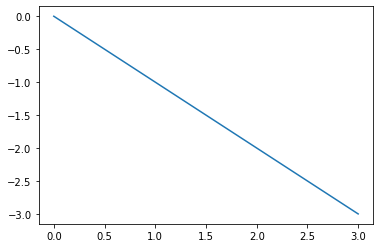

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def draw(width, height, start_co, end_co):

    # create the initial matrix with all 0s according to the dimensions specified.
    mtx = np.arange(width*height).reshape(height, width)
    mtx = np.zeros_like(mtx, int)

    # make sure start row is always the smaller value of the 2 rows given.
    # same for columns.
    start_row = start_co[0]
    start_col = start_co[1]
    end_row = end_co[0]
    end_col = end_co[1]
    if (start_co[0] > end_co[0]):
        start_row = end_co[0]
        end_row = start_co[0]
        start_col = end_co[1]
        end_col = start_co[1]

    sum = start_row + start_col

    # make sure coordinates are within range.
    if (start_row < 0) or (end_row > height) or (start_col < 0) or (end_col > width):
        print("Coordinates do not exist in the given matrix.")
        return

    # CASE 1: draw line in a single column.
    if (start_col == end_col):
        for i in range(start_row, end_row+1):
            mtx[i][start_col] = 1

    # CASE 2: draw line in a single row.
    elif (start_row == end_row):
        if (start_col < end_col):
            for j in range(start_col, end_col+1):
                mtx[start_row][j] = 1
        else:
            for j in range(end_col, start_col+1):
                mtx[start_row][j] = 1    

    # CASE 3A: draw line going diagonally left.
    elif (end_col > start_col):
        for i in range(start_row, end_row+1):
            for j in range(start_col, end_col+1):
                if ((i - j) == 0): 
                    mtx[i][j] = 1

    # CASE 3B: draw line going diagonally right.
    elif (end_col < start_col):
        for i in range(start_row, end_row+1):
            for j in range(end_col, start_col+1):
                if ((i + j) == sum): 
                    mtx[i][j] = 1


    return mtx

width = 5
height = 5
start_co = [3,3]
end_co = [0,0]
results = draw(width, height, start_co, end_co)
print(f"The matrix is:\n{results}")
print(f"The graphic plot would look like this:")
# make the y-axis negative because the matrix begins from the top right-hand corner,
#  but the plot begins from the bottom left-hand corner. making the y-coordinates
#  negative helps the visualisation of the matrix clearer.
y1 = -start_co[0]
y2 = -end_co[0]
xpoints = np.array([start_co[1], end_co[1]])
ypoints = np.array([y1,y2])
plt.plot(xpoints,ypoints)
plt.show()

8. Same as 3, but now with antialiasing, where the numbers in the resulting matrix represent the pixel transparency.

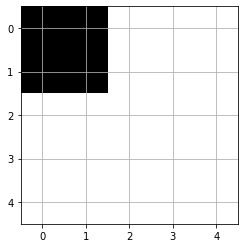

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def rasterize(lines, shape, **kwargs):
    """Rasterizes an array of lines onto an array of a specific shape using
    Matplotlib. The output lines are antialiased.

    Be wary that the line coordinates are in terms of (i, j), _not_ (x, y).

    Args: 
        lines: (line x end x coords)-shaped array of floats
        shape: (rows, columns) tuple-like

    Returns:
        arr: (rows x columns)-shaped array of floats, with line centres being
        1. and empty space being 0.
    """
    lines, shape = np.array(lines), np.array(shape)

    # Flip from (i, j) to (x, y), as Matplotlib expects
    lines = lines[:, :, ::-1]

    # Create our canvas
    fig = plt.figure()
    fig.set_size_inches(shape[::-1]/fig.get_dpi())

    # Here we're creating axes that cover the entire figure
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')

    # And now we're setting the boundaries of the axes to match the shape
    ax.set_xlim(0, shape[1])
    ax.set_ylim(0, shape[0])
    ax.invert_yaxis()

    # Add the lines
    lines = mpl.collections.LineCollection(lines, color='k', **kwargs)
    ax.add_collection(lines)

    # Then draw and grab the buffer
    fig.canvas.draw_idle()
    arr = (np.frombuffer(fig.canvas.get_renderer().buffer_rgba(), np.uint8)
                        .reshape((*shape, 4))
                        [:, :, :3]
                        .mean(-1))

    # And close the figure for all the IPython folk out there
    plt.close()

    # Finally, flip and reverse the array so empty space is 0.
    return 1 - arr/255.

width = 15
height = 15
start_co = [3,3]
end_co = [0,0]
plt.imshow(rasterize([[[1,0], [0,1]]], [5, 5]), cmap='Greys')
plt.grid()